In [1]:
import pandas as pd

### 1. Data Import and Data Exploration

**Read bookings data**

In [2]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


**Explore bookings data**

In [3]:
df_bookings.shape

(134590, 12)

In [4]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
# bookings per platform
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

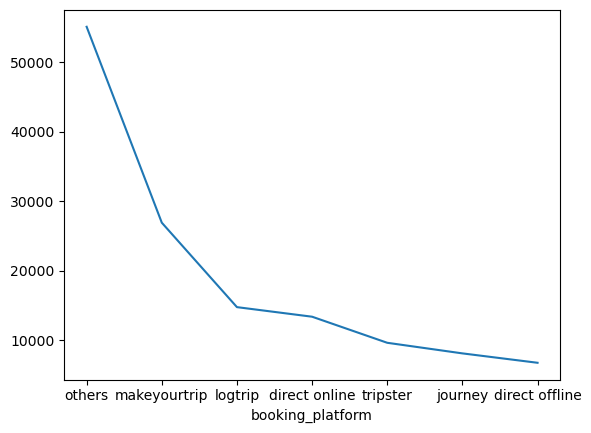

In [7]:
# line plot of booking counts from each platform
df_bookings.booking_platform.value_counts().plot()                  ## note: this `plot` function is provided by pandas only.

<Axes: xlabel='booking_platform'>

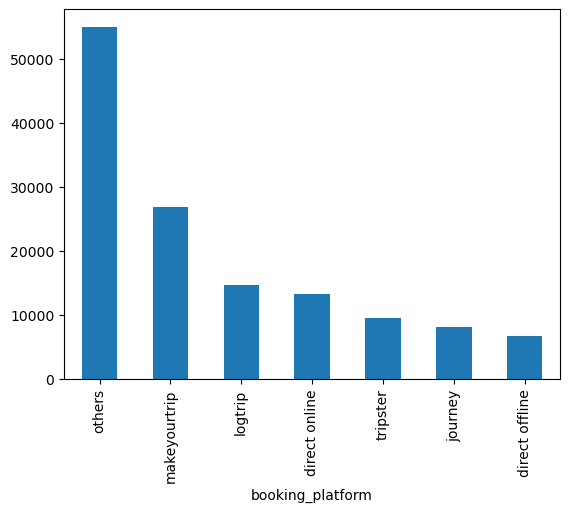

In [8]:
# bar plot of booking counts from each platform
df_bookings.booking_platform.value_counts().plot(kind = "bar")

<Axes: ylabel='booking_platform'>

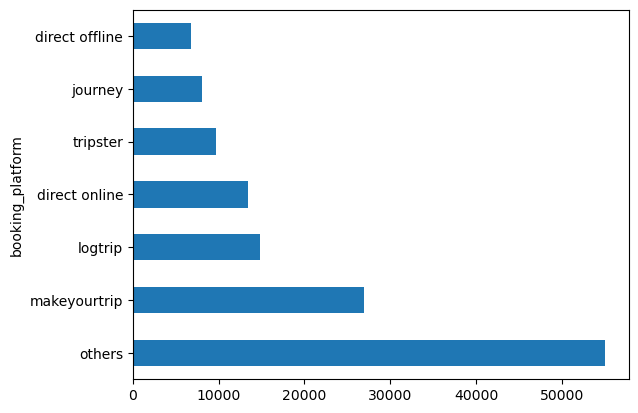

In [9]:
df_bookings.booking_platform.value_counts().plot(kind = "barh")

In [10]:
df_bookings.describe()      # this will give quick statistics{descriptive statistics} on the numerical column of the dataframe

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


* Average rating is 3.61. Hence need to improve.
* `no_guests`{number of guests}, minimum number of guest value is -17, i.e., there is soem issue in teh data, so need to look that.
* In this descriptive statistics of numerical colummns table, we see that the `revenue_generated` column has values in spatial format. to make sense of it we can use `df_bookings.revenue_generated.min()` to get minimum value and for other values also can do the same.

In [11]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

* `revenue_generated` column give revenue generated per booking, so max value is 28560000, how can a single booking be so high. There may bbe soem issue there.

#### Read rest of the files

In [12]:
df_date = pd.read_csv("datasets/dim_date.csv")
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_rooms = pd.read_csv("datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")

**explore `dim_hotels` data**

In [13]:
df_hotels.shape

(25, 4)

In [14]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [15]:
# hotels in each category
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [16]:
# hotels in each city
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [17]:
# number of hotels in each city, but in ascending order
df_hotels.city.value_counts().sort_values()

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

<Axes: xlabel='city'>

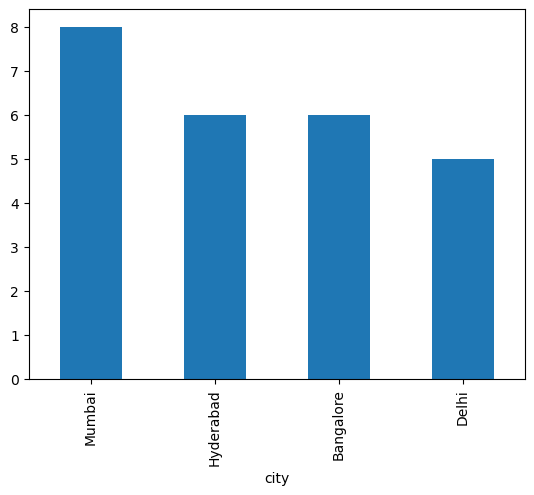

In [18]:
df_hotels.city.value_counts().plot(kind = "bar")

**Explore `fact_aggregated_bookings` data**

In [19]:
df_agg_bookings.shape

(9200, 5)

In [20]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [21]:
# Unique property ids in aggregate bookings dataset
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [22]:
# total bookings per property_id
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [23]:
# days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings["successful_bookings"]>df_agg_bookings["capacity"]]
#df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [24]:
# properties that have highest capacity
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


**2. Data Cleaning**

In [25]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In this we observed some negative values in the `no_guests` column, which can't be possible.

In [26]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [27]:
df_bookings.shape

(134590, 12)

**So we found 9 negative entries in the `no_guests` column.**

Now we can go our business manager and say that we finding some negative values, what do we do?
Or can ask the data engineer in your team to fix this error. 

But to not interrupt our analysis, you can use your common sense and can see that there are total 134590 records, out of them only 9 have these negative vlaues. So we can get rid of them.

In [28]:
# getting rid of all the records with negative `no_guests` values
df_bookings = df_bookings[df_bookings.no_guests>0]

In [29]:
df_bookings.shape

(134578, 12)

Now, we also observed some anomaly in the `revenue_generated` column

In [30]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

**How can from a single bookings, 28560000 of revenue is generated**, its not possible. It's **an outlier**.

We can discuss this problem with the business manager, asking him/her that what is teh maximum revenue that can be generated in a single booking to get some idea.

Now we can also consider `three standard deviations away from teh mean` rule, which is often used as a guideline to identify outiers. This guideline is based on `empirical rule`a.k.a. `68-95-99.7` rule.
Note, this guideline should be used in conjunction with other methods and domain knowlidge to identify and handle outliers effectively.

In [31]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [32]:
avg, std

(15378.036937686695, 93040.15493143328)

In [33]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [34]:
lower_limit = avg - 3*std
lower_limit
# now we know that revenue generated should not be negative, so we don not care much about lower_limit

-263742.4278566132

In [35]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


We found **5 outliers** in case of `revenue_generated` column

In [36]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]

In [37]:
df_bookings.shape

(134573, 12)

Now lets apply the same steps to check if such same anamoly present in `revenue_realized` column

In [38]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

We can see that maximum value of `revenue_realized` is 45220

In [39]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.3586618449

In [40]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


Now first of all 33479 is not such high of an limit, many hotels in India have cost around 50k or 60k for one night. and theer are 299 entries beyond that high limit, so lets check them further.

One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [41]:
# note this step, here i have done describe of revenue_realized data that too just for RT4 category rooms
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [42]:
# mean + 3*std
23439 + 3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

**Handling null values**

In [43]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

`ratings_given` column have 77807 null values and its ok to have null values in this column as many people do not give rating. So we not going to handle them

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [44]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

`capacity` column has 2 null values

In [45]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [46]:
df_agg_bookings.capacity.describe()

count    9198.000000
mean       25.280496
std        11.442080
min         3.000000
25%        18.000000
50%        25.000000
75%        34.000000
max        50.000000
Name: capacity, dtype: float64

mean and median{50%th value} are almost same, that means data is balanced or also can say data is symmetrically distributed around the central value. So we can impute those null values with either mean or median.

In [47]:
df_agg_bookings.capacity.median()

25.0

In [48]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace = True)

In [49]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [50]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [51]:
df_agg_bookings.shape

(9200, 5)

In [52]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]

In [53]:
df_agg_bookings.shape

(9194, 5)

**3. Data Transformation**

In [54]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


Occupancy percentage is one of the important parameter to make sense of the hospitality sector data. So we will create it as it will be of use later on.

In [55]:
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]

In [56]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [57]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x: round(x*100, 2))

In [58]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74


This creation of new column is an example of data transformation, other things that are done in this stage is like:
* **aggregating columns** to form new columns as per need. {can use group by function of pandas}
* **removing redundant columns** as per need.
* **normalisation** of the data
* **unit conversions** to have proper conversion
* **merge** two tables {using merge function of pandas}
* etc


### 4. Insights Generation

When you will be working in any company, your business manager mught come to you and ask soem adhoc questions, thats why these are also called **adhoc analysis**. These question could be any business requirement, for example if you are wrking in a hospitality sector or some hotel chain, and he/she may ask to tell occupancy rate in each room category, avg occupency rate in each city. 
So, a data analyst will open his/her jupyter notebook and will use pandas to answer those adhoc questions. 

Below are some of the questions that can be asked from the data. But there can be many questions that can be helped from this data. So, as per need your business manger may come to you asking some question from the data. They may ask you make some chart or graph to understand some stuff, then they may use it in theor presentation to show to the stakeholders.

**1. What is an average occupancy rate in each of the room categories?**

In [59]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()  # till parentheis, this line will do teh group by operation on "room_category" then will call the "occ_pct" column and then calculating the mean of the occupancy percentage in each of the room category

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

In [60]:
# now we don't know what does it mean by "RT1", "RT2" etc, the information about what kind of rooms these are in `df_rooms` dataframe

In [61]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [62]:
# merge these two

In [63]:
df = pd.merge(df_agg_bookings, df_rooms, left_on = "room_category", right_on = "room_id")   # cold have used `on` parameter if column names would have been same in both, but they are diffrenet in both the tables
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [64]:
# now can run the same `groupby` query to get the mean of the occupenacy pervemtage as perthe room category
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

In [65]:
# in the above mergeboth the common columns which had different names are also there, so we would remove one of them
df.drop("room_id", axis =1, inplace = True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


**2. Print average occupancy rate per city**

Note: the city information is available in the `df_hotels` table. So we need to merge it.

In [66]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [67]:
df = pd.merge(df, df_hotels, on = "property_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai


In [68]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

<Axes: xlabel='city'>

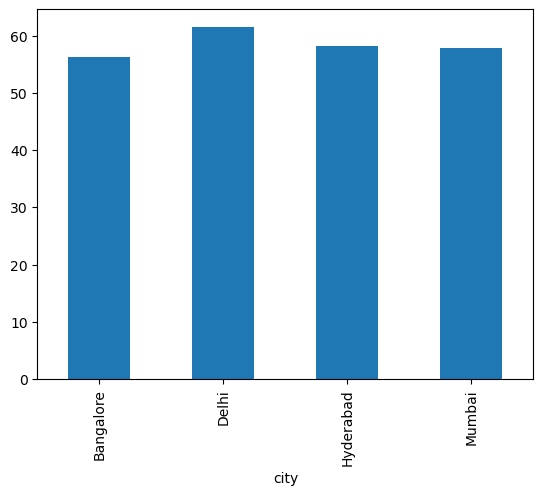

In [69]:
df.groupby("city")["occ_pct"].mean().plot(kind = "bar")

Now, your business manager or your senior, who asked you this question, if want can use this in their presentation to support their findings to teh stakeholders or buisness owners or clients. or can ask you to do that.

**3. When was the occupancy better? Weekday or Weekend?**

In [70]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


once again, my dataframe not have that weekend or weekday information. It is in `df_date` dataframe. So we will again merge it. 

In [71]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [72]:
df = pd.merge(df, df_date, left_on= "check_in_date", right_on= "date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [73]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

So, can see that occupancy was better on weekend. Which is as exoected as people take vacations and hence use hotels on weekend mostly.

**4. In the month of June, what is the occupancy for different cities**

In [74]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [75]:
df_june_22 = df[df["mmm yy"]== "Jun 22"]
df_june_22.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday


In [76]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

Delhi is performing the best. Now we will call the area manage of Bangalore and folks what is going on? Cn we look into some special discounts or is there any other way to increase hotel occupancy percentage.

**5. Now if a new dataset been given to us by data engineer, which has information of all the august month's bookings, then we may have to append that**

In [77]:
df_august = pd.read_csv(r"C:\Users\Rajesh Singh\Desktop\data science\1.Python\Project\4_code_basics_projects\1-hotel_data_analytics\datasets\new_data_august.csv")
df_august.head(5)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


Now before appending i have to make sure that the columsn are same in both the tables/dataframes

In [78]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [79]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [80]:
df_august.shape

(7, 13)

In [81]:
df.shape

(6497, 14)

* Observed that `occ_pct` in `df` is same as `occ%` in `df_august`. So need to resolve that otherwise appending will happen of both the columns with `Nan` values.
* Also `data` column has same data as `check_in_date`, both present because of the merge operation we performed. So weneed to handke that as the new dataframe has only `check_in_date`. Otherwise unnecessarily newly appended rows might `Nan` values in the `date` column

In [82]:
# renaming `occ%` to `occ_pct` in `df_august` dataframe
df_august = df_august.rename(columns = {'occ%': 'occ_pct'})

In [83]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ_pct'],
      dtype='object')

In [84]:
# now dropping the `date` column from the `df` dataframe
df.drop("date", inplace = True, axis = 1)

In [85]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [86]:
df.shape

(6497, 13)

In [87]:
df_august.shape

(7, 13)

In [88]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis= 0)   # `ignore_index = True` means ignore thge indexing of the new rows that are being added otherwise they will start from 0 onwards, `axis=0` as we are appending new rows not concatinating columns
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6496,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,Jul 22,W 32,weekend
6497,16559,01-Aug-22,RT1,30,30.0,100.00,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
6498,19562,01-Aug-22,RT1,21,30.0,70.00,Standard,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday
6499,19563,01-Aug-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday
6500,19558,01-Aug-22,RT1,30,40.0,75.00,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday
6501,19560,01-Aug-22,RT1,20,26.0,76.92,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday
6502,17561,01-Aug-22,RT1,18,26.0,69.23,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
6503,17564,01-Aug-22,RT1,10,16.0,62.50,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


**6. Print revenue realized per city**

Now revenue information is in teh `df_bookings` dataframe. Therefore need to merge it with the dataframe which has city informtion that is `df_hotels`

In [89]:
df_bookings.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [90]:
df_hotels.head(2)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai


In [91]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on= "property_id")

In [92]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [93]:
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values(ascending = False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

"Mumbai" city realized highest revenue.

**7. Print month by month revenue**

Note: should have used the `latest_df` dataframe as it has information of all the month including the august. But in the `df_bookings` dataframe where wehave revenue realized information, we do not have that information for August month. Therefor we will not use the `latest_df` here for now 

In [94]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [95]:
# have month information in the `df_date` dataframe
df_date.head(2)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday


In [96]:
pd.merge(df_bookings_all, df_date, left_on = "check_in_date", right_on = "date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


It returned nothing because both the columns on whose basis we were merging them have date data in differnet format

In [97]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(2)

C:\Users\Rajesh Singh\AppData\Local\Temp\ipykernel_2792\1024876424.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"] = pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday


In [98]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [103]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], format="mixed")   # the pd.to_datetime() function is trying to parse the date strings in your DataFrame using the default date format ("%m/%d/%Y"), but the date strings in the "check_in_date" column have two type of format: ("%d-%m-%y") and ("%m/%d/%Y"). That's why used the `format` parameter and in it passed "mixed"
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [105]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [106]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on = "check_in_date", right_on = "date")
df_bookings_all.head(2)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [107]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**8. Print revenue realized per hotel type**

In [110]:
df_bookings_all.groupby("category")["revenue_realized"].sum()

category
Business    451950715
Luxury      723557067
Name: revenue_realized, dtype: int64

**9. Print average rating per city**

In [114]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

**10. Print a pie chart of revenue realized per booking platform**

In [116]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

booking_platform
direct offline     59298844
direct online     117245053
journey            71231599
logtrip           129036321
makeyourtrip      233132708
others            480698244
tripster           84865013
Name: revenue_realized, dtype: int64

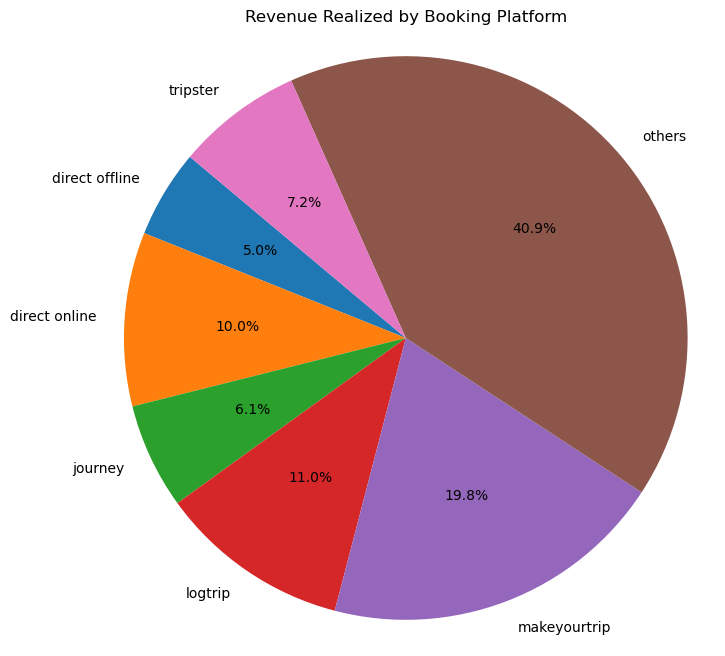

In [118]:
import matplotlib.pyplot as plt

# Group the DataFrame by "booking_platform" and calculate the sum of "revenue_realized"
platform_revenue = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(platform_revenue, labels=platform_revenue.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Realized by Booking Platform')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


<Axes: ylabel='revenue_realized'>

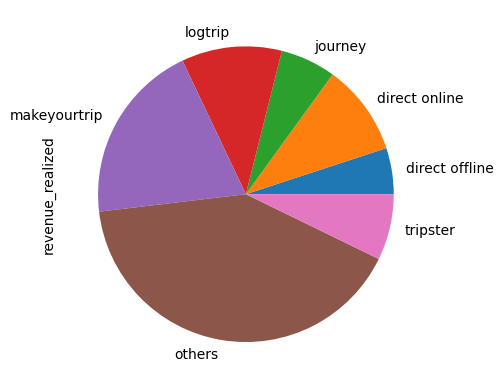

In [119]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")